In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [ ]:
# y = sin(x)/x - x/10

In [ ]:
torch.manual_seed(42)

In [ ]:
# Preparing dataset

train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 8 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])/train_data[:, 0] - train_data[:, 0]/10
train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)]

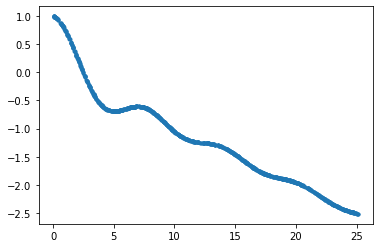

In [ ]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

In [ ]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(2, 256),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(64, 1),
        nn.Sigmoid()
    )

  def forward(self, x):
    output = self.model(x)
    return output


In [ ]:
discriminator = Discriminator()

In [ ]:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(2, 16),
        nn.ReLU(),
        nn.Linear(16, 32),
        nn.ReLU(),
        nn.Linear(32, 2)
    )

  def forward(self, x):
    output = self.model(x)
    return output

In [ ]:
generator = Generator()

In [ ]:
# Training

lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [ ]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [ ]:
for epoch in range(num_epochs):
  for n, (real_samples, _) in enumerate(train_loader):
    # data for discriminator
    real_samples_labels = torch.ones((batch_size, 1))
    latent_space_samples = torch.randn((batch_size, 2))
    generated_samples = generator(latent_space_samples)
    generated_samples_labels = torch.zeros((batch_size, 1))
    all_samples = torch.cat((real_samples, generated_samples))
    all_samples_labels = torch.cat(
        (real_samples_labels, generated_samples_labels)
    )

    # dicriminator training
    discriminator.zero_grad()
    output_discriminator = discriminator(all_samples)
    loss_discriminator = loss_function(output_discriminator, all_samples_labels)
    loss_discriminator.backward()
    optimizer_discriminator.step()

    # data for generator
    latent_space_samples = torch.randn((batch_size, 2))

    # generator training
    generator.zero_grad()
    generated_samples = generator(latent_space_samples)
    ####
    #generated_samples_det = generated_samples.detach()
    #plt.plot(generated_samples_det[:, 0], generated_samples_det[:, 1], ".")
    #plt.show()

    output_discriminator_generated = discriminator(generated_samples)
    loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
    loss_generator.backward()
    optimizer_generator.step()

    # loss printing
    if epoch % 10 == 0 and n == batch_size - 1:
      print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")


Epoch: 0 Loss D.: 0.6430457234382629
Epoch: 10 Loss D.: 0.6483147144317627
Epoch: 20 Loss D.: 0.7144813537597656
Epoch: 30 Loss D.: 0.6871196627616882
Epoch: 40 Loss D.: 0.7196519374847412
Epoch: 50 Loss D.: 0.9975457787513733
Epoch: 60 Loss D.: 0.6593854427337646
Epoch: 70 Loss D.: 0.6517081260681152
Epoch: 80 Loss D.: 0.5889708995819092
Epoch: 90 Loss D.: 0.6237560510635376
Epoch: 100 Loss D.: 0.6440982818603516
Epoch: 110 Loss D.: 0.6442384123802185
Epoch: 120 Loss D.: 0.60379958152771
Epoch: 130 Loss D.: 0.6870537400245667
Epoch: 140 Loss D.: 0.6947921514511108
Epoch: 150 Loss D.: 0.6285185813903809
Epoch: 160 Loss D.: 0.6646751761436462
Epoch: 170 Loss D.: 0.7106678485870361
Epoch: 180 Loss D.: 0.6488059759140015
Epoch: 190 Loss D.: 0.6059112548828125
Epoch: 200 Loss D.: 0.6425750851631165
Epoch: 210 Loss D.: 0.6849361062049866
Epoch: 220 Loss D.: 0.6428881883621216
Epoch: 230 Loss D.: 0.6433915495872498
Epoch: 240 Loss D.: 0.6396036148071289
Epoch: 250 Loss D.: 0.6052191257476807

In [ ]:
# Testing

latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

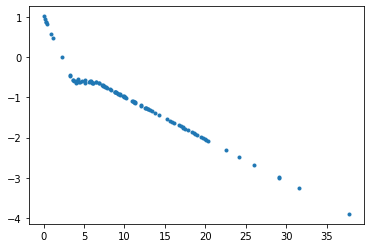

In [ ]:
# Ploting

generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")